IMPORTING THE NECCESSARY MODULES

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from  sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


EXPLORATION OF DATA

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
#checking null values
df.isnull().sum().sum()

0

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [9]:
df.shape

(96146, 9)

In [10]:
#cahnging the gender to integer form
df["gender"]=df["gender"].map({"Female":0,"Male":1})

In [11]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,never,25.19,6.6,140,0
1,0.0,54.0,0,0,No Info,27.32,6.6,80,0
2,1.0,28.0,0,0,never,27.32,5.7,158,0
3,0.0,36.0,0,0,current,23.45,5.0,155,0
4,1.0,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0.0,36.0,0,0,No Info,24.60,4.8,145,0
99996,0.0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1.0,66.0,0,0,former,27.83,5.7,155,0
99998,0.0,24.0,0,0,never,35.42,4.0,100,0


In [12]:
df.drop_duplicates(inplace=True)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,never,25.19,6.6,140,0
1,0.0,54.0,0,0,No Info,27.32,6.6,80,0
2,1.0,28.0,0,0,never,27.32,5.7,158,0
3,0.0,36.0,0,0,current,23.45,5.0,155,0
4,1.0,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0.0,36.0,0,0,No Info,24.60,4.8,145,0
99996,0.0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1.0,66.0,0,0,former,27.83,5.7,155,0
99998,0.0,24.0,0,0,never,35.42,4.0,100,0


In [13]:
df["smoking_history"].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [14]:
#MAPPING THE SMOKING_HISTORY COLUMN
smoking_history_mapping = {'never': 0, 'No Info': -1, 'current': 2, 'former': 1, 'ever': 2, 'not current': 0}
df['smoking_history'] = df['smoking_history'].map(smoking_history_mapping)


In [15]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,0,25.19,6.6,140,0
1,0.0,54.0,0,0,-1,27.32,6.6,80,0
2,1.0,28.0,0,0,0,27.32,5.7,158,0
3,0.0,36.0,0,0,2,23.45,5.0,155,0
4,1.0,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0.0,36.0,0,0,-1,24.60,4.8,145,0
99996,0.0,2.0,0,0,-1,17.37,6.5,100,0
99997,1.0,66.0,0,0,1,27.83,5.7,155,0
99998,0.0,24.0,0,0,0,35.42,4.0,100,0


In [16]:
df['age'] = df['age'].astype(int)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80,0,1,0,25.19,6.6,140,0
1,0.0,54,0,0,-1,27.32,6.6,80,0
2,1.0,28,0,0,0,27.32,5.7,158,0
3,0.0,36,0,0,2,23.45,5.0,155,0
4,1.0,76,1,1,2,20.14,4.8,155,0


In [17]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80,0,1,0,25.19,6.6,140,0
1,0.0,54,0,0,-1,27.32,6.6,80,0
2,1.0,28,0,0,0,27.32,5.7,158,0
3,0.0,36,0,0,2,23.45,5.0,155,0
4,1.0,76,1,1,2,20.14,4.8,155,0
5,0.0,20,0,0,0,27.32,6.6,85,0
6,0.0,44,0,0,0,19.31,6.5,200,1
7,0.0,79,0,0,-1,23.86,5.7,85,0
8,1.0,42,0,0,0,33.64,4.8,145,0
9,0.0,32,0,0,0,27.32,5.0,100,0


In [18]:
df.dtypes

gender                 float64
age                      int32
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

PLOTTING BAR GRAPH FOR THE DATASET

<Axes: >

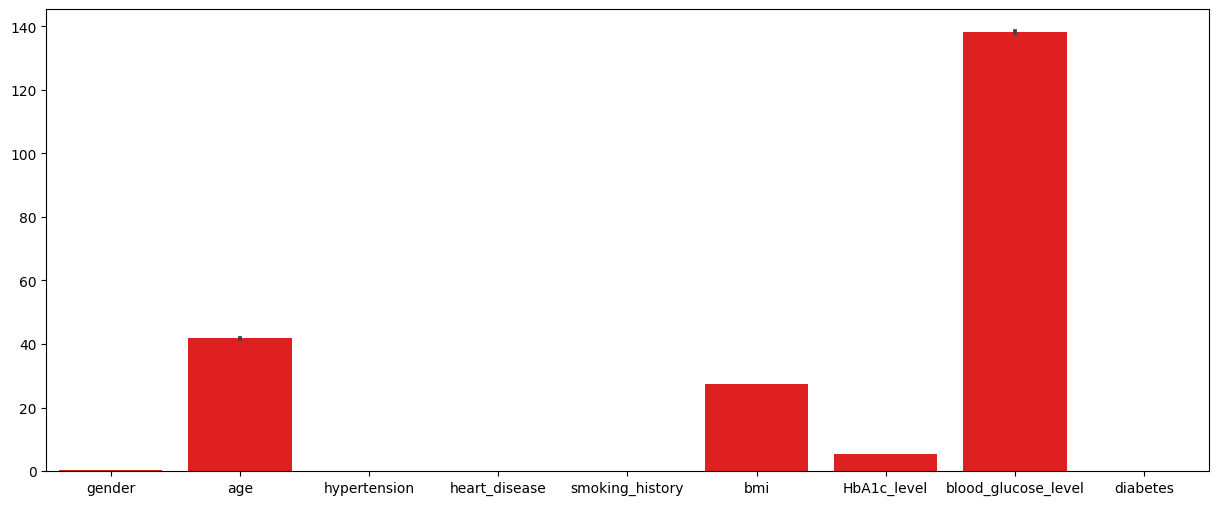

In [19]:
plt.figure(figsize=(15,6))
sns.barplot(data=df,color="red")


[]

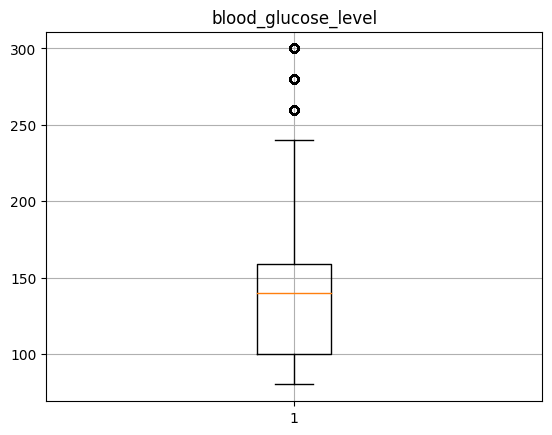

In [20]:
plt.boxplot(df["blood_glucose_level"])
plt.grid()
plt.title('blood_glucose_level')
plt.plot()

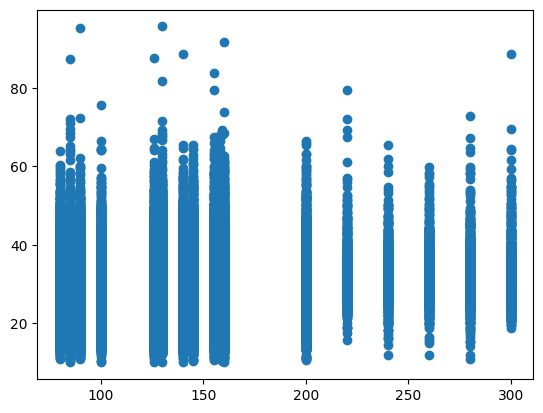

In [21]:
plt.scatter(df["blood_glucose_level"],df["bmi"])

In [22]:
X=df.drop(["diabetes","gender"],axis=1)
y=df["diabetes"]


INPUT INFOS 

In [23]:
X

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,80,0,1,0,25.19,6.6,140
1,54,0,0,-1,27.32,6.6,80
2,28,0,0,0,27.32,5.7,158
3,36,0,0,2,23.45,5.0,155
4,76,1,1,2,20.14,4.8,155
...,...,...,...,...,...,...,...
99994,36,0,0,-1,24.60,4.8,145
99996,2,0,0,-1,17.37,6.5,100
99997,66,0,0,1,27.83,5.7,155
99998,24,0,0,0,35.42,4.0,100


TARGET VALUES

In [24]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 96146, dtype: int64

In [25]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80,0,1,0,25.19,6.6,140,0
1,0.0,54,0,0,-1,27.32,6.6,80,0
2,1.0,28,0,0,0,27.32,5.7,158,0
3,0.0,36,0,0,2,23.45,5.0,155,0
4,1.0,76,1,1,2,20.14,4.8,155,0


SPLITTING THE DATASET FOR TRANING AND TESTING

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
DTC=DecisionTreeClassifier()

In [28]:
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
y_predict=DTC.predict(X_test)
y_predict

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [30]:

print(metrics.accuracy_score(y_test, y_predict))
print(metrics.recall_score(y_test, y_predict, zero_division=1))
print(metrics.precision_score(y_test, y_predict, zero_division=1))
print(metrics.classification_report(y_test, y_predict, zero_division=1))


0.9488299531981279
0.7350377687391052
0.7055214723926381
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17509
           1       0.71      0.74      0.72      1721

    accuracy                           0.95     19230
   macro avg       0.84      0.85      0.85     19230
weighted avg       0.95      0.95      0.95     19230



In [31]:
RF=RandomForestClassifier()

In [32]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
y_predict=RF.predict(X_test)

In [34]:

print(metrics.accuracy_score(y_test, y_predict))
print(metrics.recall_score(y_test, y_predict, zero_division=1))
print(metrics.precision_score(y_test, y_predict, zero_division=1))
print(metrics.classification_report(y_test, y_predict, zero_division=1))
print(RF.score(X_train,y_train))


0.9672906916276651
0.6885531667635096
0.9272300469483568
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17509
           1       0.93      0.69      0.79      1721

    accuracy                           0.97     19230
   macro avg       0.95      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230

0.9985568672317853


In [35]:
# The random forest collects the data of each tree and forecasts the future based on the majority of predictions, rather than relying on a single decision tree.